## Usual Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



According to World Health Organization (WHO), "Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans." 

It has been more than one month since the first case of this new zootonic virus has been reported. Wuhan, the capital of Hubei province of China is the epicenter of this new virus. The situation reports about this outbreak can be found [here.](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/)

In this notebook I will try to get a one month overview of the outbreak. 

## Importing Dataset

In [2]:
df= pd.read_csv("2019_nCoV_data.csv")
df.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [3]:
# Let's check the infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
Sno               497 non-null int64
Province/State    393 non-null object
Country           497 non-null object
Last Update       497 non-null object
Confirmed         497 non-null float64
Deaths            497 non-null float64
Recovered         497 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.3+ KB


In [4]:
# Convert Last Update column to datetime64 format
df['Last Update'] = df['Last Update'].apply(pd.to_datetime)
df.drop(['Sno'],axis=1,inplace=True)
df.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [5]:
df['Last Update'].max()

Timestamp('2020-01-31 19:00:00')

We know this kind of viruses can spread primarily through contact with an infected person, through respiratory droplets generated when a person, for example, coughs or sneezes, or through droplets of saliva or discharge from the nose. The same happened with 2019-nCov, so let's see in which countries are mostly affected by this virus.

In [6]:
countries = df['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by virus:  31


## Scenerio till 31 January, 2020

In [7]:
from datetime import date

# print(pd.Timestamp(date(2020,1,31)))
latest_data = df[df['Last Update'] > pd.Timestamp(date(2020,1,31))]

# SELECT * FROM df WHERE last_udpate BETWEEN 2020-01-30 AND 2020-01-31;

latest_data.sort_values(by=['Last Update'], ascending=False)

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
434,Hubei,Mainland China,2020-01-31 19:00:00,7153.0,249.0,169.0
481,British Columbia,Canada,2020-01-31 19:00:00,1.0,0.0,0.0
468,Washington,US,2020-01-31 19:00:00,1.0,0.0,0.0
469,Illinois,US,2020-01-31 19:00:00,2.0,0.0,0.0
470,California,US,2020-01-31 19:00:00,3.0,0.0,0.0
471,Arizona,US,2020-01-31 19:00:00,1.0,0.0,0.0
472,NaN,Japan,2020-01-31 19:00:00,17.0,0.0,1.0
473,NaN,Thailand,2020-01-31 19:00:00,19.0,0.0,7.0
474,NaN,South Korea,2020-01-31 19:00:00,11.0,0.0,0.0
475,NaN,Singapore,2020-01-31 19:00:00,16.0,0.0,0.0


In [8]:
print('Globally Confirmed Cases: ',latest_data['Confirmed'].sum())
print('Global Deaths: ',latest_data['Deaths'].sum())
print('Globally Recovered Cases: ',latest_data['Recovered'].sum())

Globally Confirmed Cases:  11374.0
Global Deaths:  259.0
Globally Recovered Cases:  252.0


In [9]:
# Let's look the various Provinces/States affected

latest_data.groupby(['Country','Province/State']).sum()


Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales         4.0     0.0        2.0
               Queensland              3.0     0.0        0.0
               Victoria                2.0     0.0        0.0
Canada         British Columbia        1.0     0.0        0.0
               Ontario                 2.0     0.0        0.0
Germany        Bavaria                 7.0     0.0        0.0
Hong Kong      Hong Kong              13.0     0.0        0.0
Macau          Macau                   7.0     0.0        0.0
Mainland China Anhui                 237.0     0.0        3.0
               Beijing               139.0     1.0        5.0
               Chongqing             238.0     1.0        1.0
               Fujian                120.0     0.0        0.0
               Gansu                  35.0     0.0        0.0
               Guangdong             436.0     0.0       10.0
               Guangxi                88.0     0.0        2.0
               Guizhou                29.0     0.0        2.0
               Hainan                 58.0     1.0        1.0
               Hebei                  96.0     1.0        0.0
               Heilongjiang           59.0     2.0        0.0
               Henan                 352.0     2.0        3.0
               Hubei                7153.0   249.0      169.0
               Hunan                 332.0     0.0        3.0
               Inner Mongolia         20.0     0.0        0.0
               Jiangsu               168.0     0.0        5.0
               Jiangxi               240.0     0.0        7.0
               Jilin                  14.0     0.0        1.0
               Liaoning               60.0     0.0        1.0
               Ningxia                21.0     0.0        1.0
               Qinghai                 8.0     0.0        0.0
               Shaanxi                87.0     0.0        0.0
               Shandong              184.0     0.0        2.0
               Shanghai              153.0     1.0        9.0
               Shanxi                 47.0     0.0        1.0
               Sichuan               177.0     1.0        1.0
               Tianjin                32.0     0.0        0.0
               Tibet                   1.0     0.0        0.0
               Xinjiang               17.0     0.0        0.0
               Yunnan                 83.0     0.0        1.0
               Zhejiang              537.0     0.0       14.0
Taiwan         Taiwan                 10.0     0.0        0.0
US             Arizona                 1.0     0.0        0.0
               California              3.0     0.0        0.0
               Illinois                2.0     0.0        0.0
               Washington              1.0     0.0        0.0

In [10]:
# Creating a dataframe with total no of cases for every country


cases = pd.DataFrame(latest_data.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,28)

global_cases = cases[['Country','Confirmed','Deaths', 'Recovered']]
global_cases

,Country,Confirmed,Deaths,Recovered
1,Australia,9.0,0.0,2.0
2,Cambodia,1.0,0.0,0.0
3,Canada,3.0,0.0,0.0
4,Finland,1.0,0.0,0.0
5,France,6.0,0.0,0.0
6,Germany,7.0,0.0,0.0
7,Hong Kong,13.0,0.0,0.0
8,India,1.0,0.0,0.0
9,Italy,2.0,0.0,0.0
10,Japan,17.0,0.0,1.0


In [11]:
map_data = pd.DataFrame({
   'name':list(global_cases['Country']),
   'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,61.52,1.35,35.91,40.46,7.87,60.12,23.7,15.87,55.37,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,105.31,103.82,127.77,3.74,80.77,18.64,120.96,100.99,3.43,-95.71,53.84,108.28],
})
fig= go.Figure()
fig.add_trace(go.Scattergeo(
        lat= map_data['lat'],
        lon= map_data['lon'],
        mode= 'markers',
        marker= dict(
            size= 12,
            color='rgb(255, 0, 0)',
            opacity= 0.7
        ),
        text= map_data['name'],
        hoverinfo= 'text'
    ))

fig.add_trace(go.Scattergeo(
        lat= map_data['lat'],
        lon= map_data['lon'],
        mode= 'markers',
        marker= dict(
            size= 8,
            color= 'rgb(242, 177, 172)',
            opacity= 0.7
        ),
        hoverinfo= 'none'
    ))

fig.update_layout(
        autosize= True,
        hovermode= 'closest',
        showlegend= False,
        title_text= 'Countries with reported confirmed cases, Deaths, Recovered of 2019-nCoV,<br>31 January, 2020',
    geo= go.layout.Geo(
        showframe= False,
        showcoastlines= True,
        showcountries= True,
        landcolor= "rgb(225, 225, 225)",
        countrycolor= "blue",
        coastlinecolor= "blue",
        projection_type= "natural earth"
    ))

 
fig.show()

**Let's see if any countries have death cases other than China:**

In [12]:
global_cases.groupby('Country')[ 'Deaths'].sum()

Country
Australia                 0.0
Cambodia                  0.0
Canada                    0.0
Finland                   0.0
France                    0.0
Germany                   0.0
Hong Kong                 0.0
India                     0.0
Italy                     0.0
Japan                     0.0
Macau                     0.0
Mainland China          259.0
Malaysia                  0.0
Nepal                     0.0
Philippines               0.0
Russia                    0.0
Singapore                 0.0
South Korea               0.0
Spain                     0.0
Sri Lanka                 0.0
Sweden                    0.0
Taiwan                    0.0
Thailand                  0.0
UK                        0.0
US                        0.0
United Arab Emirates      0.0
Vietnam                   0.0
Name: Deaths, dtype: float64

**So till 31 January, 2020 no other countries have reported deaths. So let's focus on the present state of China:**

## Focus in China

In [13]:
#Mainland China
China = latest_data[latest_data['Country']== 'Mainland China']
China

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
434,Hubei,Mainland China,2020-01-31 19:00:00,7153.0,249.0,169.0
435,Zhejiang,Mainland China,2020-01-31 19:00:00,537.0,0.0,14.0
436,Guangdong,Mainland China,2020-01-31 19:00:00,436.0,0.0,10.0
437,Henan,Mainland China,2020-01-31 19:00:00,352.0,2.0,3.0
438,Hunan,Mainland China,2020-01-31 19:00:00,332.0,0.0,3.0
439,Jiangxi,Mainland China,2020-01-31 19:00:00,240.0,0.0,7.0
440,Chongqing,Mainland China,2020-01-31 19:00:00,238.0,1.0,1.0
441,Anhui,Mainland China,2020-01-31 19:00:00,237.0,0.0,3.0
442,Shandong,Mainland China,2020-01-31 19:00:00,184.0,0.0,2.0
443,Sichuan,Mainland China,2020-01-31 19:00:00,177.0,1.0,1.0


Let's look at the Confirmed vs Recovered figures of Provinces of China other than Hubei

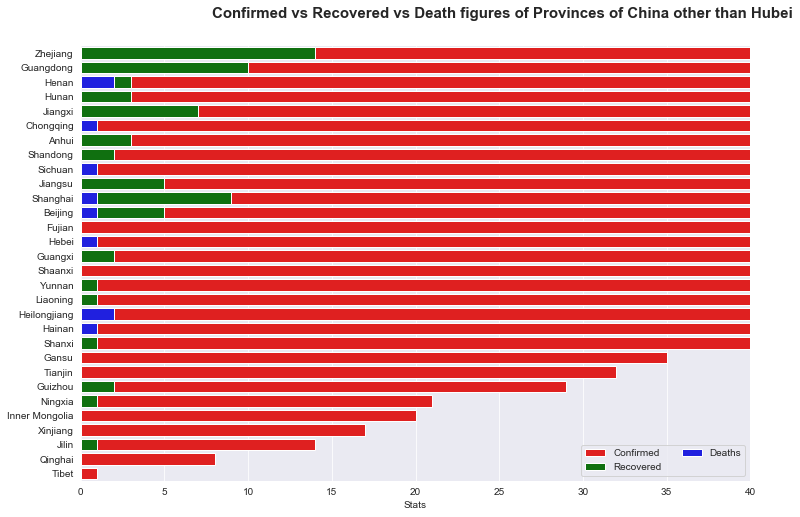

In [14]:
f, ax = plt.subplots(figsize=(12, 8))


sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")


sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")


sns.barplot(x="Deaths", y="Province/State", data=China[1:],
            label="Deaths", color="b")

# Add a legend and informative axis label
ax.set_title('Confirmed vs Recovered vs Death figures of Provinces of China other than Hubei', fontsize=15, fontweight='bold', position=(0.63, 1.05))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

**Now let's see which provinces have the highest percentage of confirmed cases:**

In [15]:
percentage = pd.DataFrame(China.groupby('Province/State').sum()['Confirmed']).reset_index()
fig = go.Figure(data= [go.Pie(labels= percentage['Province/State'], values= percentage.Confirmed)])
fig.update_layout(title="Confirmed cases in province/states of Mainland China")
fig.show()

**The highest deat tolls:**

In [16]:
percentage = pd.DataFrame(China.groupby('Province/State').sum()['Deaths']).reset_index()
fig = go.Figure(data= [go.Pie(labels= percentage['Province/State'], values= percentage.Deaths)])
fig.update_layout(title="Death tolls in province/states of Mainland China")
fig.show()

**Also checking the recovery rate:**

In [17]:
percentage = pd.DataFrame(China.groupby('Province/State').sum()['Recovered']).reset_index()
fig = go.Figure(data= [go.Pie(labels= percentage['Province/State'], values= percentage.Recovered)])
fig.update_layout(title="Recovery rates in province/states of Mainland China")
fig.show()

## Conclusion

**As Wuhan is the epicenter of the coronavirus and capital of the Hubei province, so it has the highest rate in all three features. The recovery rate is still not so high. But we hope and pray this pandemic ends soon and people can start living a normal fear free life again in China and all over the world.**